# Evaluation

This notebook covers the automatic and human evaluations of our experiment.

In [1]:
# Install all the required packages.
%pip install bert-score
!pip install rouge-score
!pip install scipy
import pandas as pd
from bert_score import BERTScorer
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import scipy.stats
import itertools

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
#read the dataset
df_test_results = pd.read_pickle('../test_results.pkl')

## Bert score

In [3]:
# initialize BERT-Score object
scorer = BERTScorer(lang="en")

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
# calculate BERT-Score for each turn in each dialogue of testset
# one time Groundtrouth vs. Aproach, second time Groundtrouth vs. Basline
df_test_results['bert_score'] = df_test_results['results'].map(lambda l: list(map(lambda e: [scorer.score([e[1]],[e[2]]), scorer.score([e[1]],[e[3]])], l)))

In [5]:
# calculate_avg_bert_score_Approach for one dialogue
def calculate_avg_bert_score_Approach(row):
    cnt, res = 0, 0
    for (p1, r1, f11), (p2, r2, f12) in row:
        cnt += 1   
        res += f11 #Approach
    return res/cnt

In [6]:
# calculate_avg_bert_score_Basline for one dialogue
def calculate_avg_bert_score_Basline(row):
    cnt, res = 0, 0
    for (p1, r1, f11), (p2, r2, f12) in row:
        cnt += 1   
        res += f12 #Basline
    return res/cnt

In [7]:
# Calculate BERT-Scores
df_test_results['bert_score_avg_Ap'] = df_test_results['bert_score'].apply(calculate_avg_bert_score_Approach)
df_test_results['bert_score_avg_BL'] = df_test_results['bert_score'].apply(calculate_avg_bert_score_Basline)
df_test_results.bert_score_avg_Ap = df_test_results.bert_score_avg_Ap.apply(lambda l: l[0].item())
df_test_results.bert_score_avg_BL = df_test_results.bert_score_avg_BL.apply(lambda l: l[0].item())

## Rouge score

In [8]:
# Calculate ROUGE scores
rg_scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
df_test_results['rouge_score_Approach'] = df_test_results['results'].map(lambda l: list(map(lambda e: rg_scorer.score(e[1],e[2])['rougeL'][2], l)))
df_test_results['rouge_score_Basline'] = df_test_results['results'].map(lambda l: list(map(lambda e: rg_scorer.score(e[1],e[3])['rougeL'][2], l)))
df_test_results['Rouge_Score_Avg_Approach'] = df_test_results['rouge_score_Approach'].map(lambda l: sum(l)/len(l))
df_test_results['Rouge_Score_Avg_Basline'] = df_test_results['rouge_score_Basline'].map(lambda l: sum(l)/len(l))

## Summary of Automatic Evaluation

In [9]:
df_test_results[['bert_score_avg_Ap', 'bert_score_avg_BL', 'Rouge_Score_Avg_Approach', 'Rouge_Score_Avg_Basline']].describe()

,bert_score_avg_Ap,bert_score_avg_BL,Rouge_Score_Avg_Approach,Rouge_Score_Avg_Basline
count,93.000000,93.000000,93.000000,93.000000
mean,0.834558,0.837533,0.119267,0.113573
std,0.013170,0.015461,0.030939,0.034984
min,0.769603,0.789216,0.047974,0.033400
25%,0.827090,0.831276,0.103958,0.094271
50%,0.836165,0.837796,0.118117,0.111499
75%,0.844096,0.846885,0.139906,0.137580
max,0.856758,0.875337,0.202810,0.217816


## Human Evaluation

In [10]:
# Enter the data of human evaluation
U1 = [ 
    1, 3, 2, 1, 3, 2, 3, 2, 1, 3, 2, 1, 1, 2, 3, 2, 1, 3, 2, 3, 1, 3, 2, 1, 1,
    3, 2, 2, 1, 3, 2, 1, 3, 3, 1, 2, 1, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 1, 1, 2,
    3, 2, 3, 1, 3, 1, 2, 1, 2, 3, 1, 2, 3, 1, 2, 3, 3, 1, 2, 2, 3, 1, 3, 2, 1,
    1, 2, 3, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 1, 2
]
U2 = [
    1, 3, 2, 1, 3, 2, 3, 1, 2, 3, 2, 1, 1, 2, 3, 1, 3, 2, 1, 2, 3, 3, 1, 2, 1,
    2, 3, 1, 3, 2, 2, 1, 3, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 3, 1, 1, 2,
    3, 2, 1, 3, 1, 3, 2, 1, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1, 3, 1, 3, 2, 1, 3, 2,
    1, 3, 2, 2, 1, 3, 1, 2, 3, 3, 1, 2, 1, 3, 2
]
U3 = [ 
    1, 3, 2, 1, 2, 3, 3, 2, 1, 3, 2, 1, 2, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 2, 1,
    2, 3, 1, 2, 3, 3, 2, 1, 2, 1, 3, 2, 3, 1, 3, 2, 1, 2, 3, 1, 2, 3, 1, 1, 2,
    3, 1, 3, 2, 3, 1, 2, 1, 2, 3, 2, 1, 3, 3, 1, 2, 3, 1, 2, 2, 3, 1, 1, 3, 2,
    1, 3, 2, 2, 1, 3, 1, 2, 3, 3, 1, 2, 3, 1, 2
]

U4 = [ 
    1, 2, 3, 1, 3, 2, 3, 2, 1, 3, 2, 1, 1, 2, 3, 2, 1, 3, 1, 2, 3, 1, 3, 2, 1,
    3, 2, 3, 1, 2, 3, 2, 1, 3, 1, 2, 2, 1, 3, 3, 1, 2, 1, 2, 3, 2, 3, 1, 1, 2,
    3, 3, 2, 1, 1, 3, 2, 3, 2, 1, 2, 1, 3, 1, 2, 3, 3, 1, 2, 1, 3, 2, 2, 3, 1,
    1, 2, 3, 3, 2, 1, 3, 2, 1, 2, 1, 3, 3, 1, 2
]
U5 = [ 
    1, 3, 2, 1, 2, 3, 3, 1, 2, 3, 2, 1, 3, 2, 1, 1, 3, 2, 3, 2, 1, 3, 1, 2, 1,
    3, 2, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 3, 2, 2, 3, 1, 1, 2,
    3, 2, 1, 3, 3, 1, 2, 3, 1, 2, 2, 1, 3, 3, 1, 2, 3, 2, 1, 2, 3, 1, 1, 3, 2,
    2, 1, 3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 1, 2
]
U6 = [
    1, 3, 2, 1, 2, 3, 3, 2, 1, 3, 2, 1, 1, 2, 3, 1, 2, 3, 2, 3, 1, 1, 2, 3, 1,
    2, 3, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 2, 1, 3, 2, 1, 3, 1, 3, 2, 2, 1,
    3, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 1, 3, 1, 2, 3, 3, 1, 2, 2, 3, 1, 1, 3, 2,
    2, 1, 3, 3, 1, 2, 2, 1, 3, 3, 1, 2, 3, 1, 2
]
U7 = [
    1, 2, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 3, 2, 3, 1, 1, 2, 3, 3, 2, 1, 1,
    2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 2, 3, 2, 1, 3, 1, 3, 2, 3, 2, 1, 2, 1,
    3, 1, 2, 3, 1, 3, 2, 1, 2, 3, 1, 3, 2, 1, 2, 3, 3, 2, 1, 2, 3, 1, 1, 3, 2,
    1, 2, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3
]
U8 = [
    2, 1, 3, 1, 2, 3, 3, 2, 1, 3, 2, 1, 2, 1, 3, 1, 2, 3, 3, 2, 1, 2, 1, 3, 1,
    2, 3, 1, 2, 3, 3, 2, 1, 2, 1, 3, 1, 2, 3, 3, 1, 2, 1, 2, 3, 3, 2, 1, 1, 2,
    3, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 1, 3, 1, 3, 2, 2, 1, 3, 2, 3, 1, 2, 3, 1,
    1, 2, 3, 3, 2, 1, 1, 2, 3, 1, 2, 3, 1, 3, 2
]


In [11]:
# Calculate the Kendall Tau correlation coefficients for all pairs of arrays and calculate the average for all pairs
array_names = ["U1", "U2", "U3", "U4", "U5", "U6", "U7", "U8"]
arrays = [U1, U2, U3, U4, U5, U6, U7, U8]

kendall_tau_results = []

for i in range(len(arrays) - 1):
    for j in range(i + 1, len(arrays)):
        kendall_tau = scipy.stats.kendalltau(arrays[i], arrays[j])
        kendall_tau_results.append(kendall_tau.correlation)
        print(kendall_tau.correlation)

average_kendall_tau = sum(kendall_tau_results) / len(kendall_tau_results)
print(f"Average Kendall Tau correlation coefficient for all pairs of arrays: {average_kendall_tau}")

0.2911111111111111
0.32999999999999996
0.41666666666666663
0.22999999999999998
0.3774074074074074
0.22555555555555556
0.2644444444444444
0.32111111111111107
0.21518518518518517
0.2033333333333333
0.3796296296296296
0.4381481481481481
0.2211111111111111
0.13444444444444445
0.4681481481481481
0.35148148148148145
0.2374074074074074
0.3074074074074074
0.18
0.3725925925925926
0.3037037037037037
0.33481481481481484
0.3655555555555555
0.197037037037037
0.257037037037037
0.3648148148148148
0.3555555555555555
0.3
Average Kendall Tau correlation coefficient for all pairs of arrays: 0.3015608465608466


In [12]:
# Enter the summary of Human Evaluation A (Groundtruth), B (Approach), C (Baseline)

human_eval_summary = {
#               A , B , C
    'Rank 1': [109, 69, 62],
    'Rank 2': [56, 104, 80],
    'Rank 3': [75, 67, 98]
}

# Define the index labels
index_labels = ['Groundtruth', 'Approach', 'Baseline']

# Create the pandas DataFrame
df_human_eval_summary = pd.DataFrame(human_eval_summary, index=index_labels)

# To display the DataFrame, you can use
print(df_human_eval_summary)


             Rank 1  Rank 2  Rank 3
Groundtruth     109      56      75
Approach         69     104      67
Baseline         62      80      98


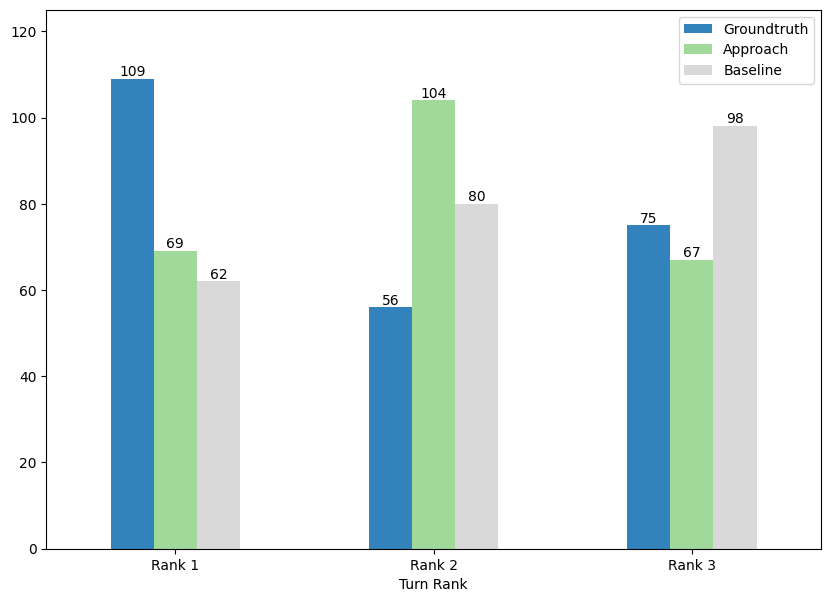

In [13]:
# Create the bar chart using the DataFrame `df`
ax = df_human_eval_summary.T.plot(kind='bar', figsize=(10, 7), colormap='tab20c')


# Set the title and labels
# ax.set_title('Comparison of Results of Human Evaluation')
ax.set_xlabel('Turn Rank')
plt.xticks(rotation=0)
# ax.set_ylabel('Occurrences')
ax.set_ylim([0, 125])
for container in ax.containers:
    ax.bar_label(container)

# Display the plot
plt.show()
